参考资料：
+ https://blog.csdn.net/shebao3333/article/details/78808066 - 好
+ https://blog.csdn.net/xdzhangzhenhao/article/details/81147838
+ 

In [1]:
import os
import numpy as np 
import pandas as pd 
from cv2 import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt 

ROOT_DIR = os.getcwd()
IMG_DTR = os.path.join(ROOT_DIR, 'images')

In [2]:
target_imgs = [ os.path.join(IMG_DTR, img_name) for img_name in os.listdir(IMG_DTR)] 
target_imgs.sort() # 升序，注意不能 listA = listA.sort(), sort没有返回值
target_imgs

['/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码0.jpg',
 '/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码1.jpg',
 '/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码2.jpg',
 '/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码3.jpg',
 '/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码4.jpg',
 '/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码5.png',
 '/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码6.png',
 '/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码7.png',
 '/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码8.png',
 '/Users/rgmax/Desktop/Ex2_验证码识别/images/验证码9.png']

In [3]:
# 为了方便图片直接显示在jupyter中，cv的imshow不能直接在jupyter中显示
# 为了用matplotlib显示（ 不能用plt.show()，要用plt.imshow() ）
# 由于CV的通道是BGR顺序，而matpotlib是 RGB顺序，这里要做通道转换
# 方法一
def bgr2rgb_v2(img):
    # 用cv自带的分割和合并函数
    B,G,R = cv.split(img)
    return cv.merge([R,G,B])
# 方法二
def bgr2rgb(img):
    # 直接用python切片特性，[start: end: step], 这里start end为空，则默认遍历全部，step为-1则倒序遍历
    return img[:, :, ::-1]

In [4]:
target = target_imgs[9]
img = cv.imread(target, cv.IMREAD_UNCHANGED) # 以原始格式读入图片
img.shape 

(60, 300, 3)

这里读的图是 验证码.jpg 其尺寸为 59x18 （长x宽），色彩空间为 RGB    
看img矩阵的shape为 (18,59,3)，其中3为像素模式，cv顺序为BGR


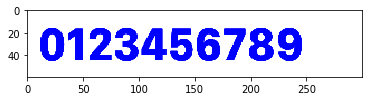

In [5]:
plt.imshow(img) # 未将通道改成RGB

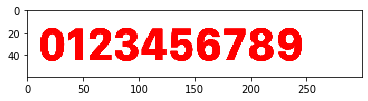

In [6]:
plt.imshow(bgr2rgb(img)) # 改成RGB模式

In [7]:
img_gray = cv.imread(target, cv.IMREAD_GRAYSCALE) # 以灰度图格式读入
img_gray.shape # 灰度图了，就没有第三个维度了

(60, 300)

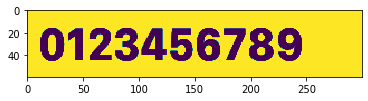

In [8]:
img_gray = cv.imread(target, cv.IMREAD_GRAYSCALE) # 以灰度图格式读入
plt.imshow(img_gray) # 直接show不会是灰度图展示

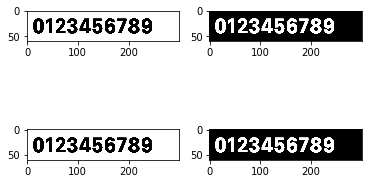

In [9]:
# 绘画灰度图的四种方法
i = 1
for cmap in [plt.cm.gray, plt.cm.gray_r, 'gray', 'gray_r']: # gray_r中的r表示reverse，代表逆转, 黑白颠倒
    plt.subplot(2,2,i); plt.imshow(img_gray, cmap=cmap)
    i += 1

[Python+OpenCV图像处理之图像二值化](https://www.cnblogs.com/qianxia/p/11093722.html)

In [10]:
def genNeedImg(img_path, img_type='binary', binary_therhold=127, 
               binary_reverse=False, size=None, save=False, path='./'):
    '''
    用于生成指定大小的灰度图或二值图, img_path为图像路径
    type为标志转换类型，默认为binary，可选的值为binary或gray
    binary_therhold为二值图划分阈值，默认127（即大于127的像素设置为255，否则置0）
    binary_reverse默认为False，True时黑白颠倒（即大于127的像素设置为0，否则置255）
    size为tuple类型，用于指定生成图像的尺寸, 如：(512,512)，默认为None表示输出原图像尺寸
    save为保存标志，默认为False，为true时将生成的图保存到path(默认为当前文件夹)
    '''
    img_raw = cv.imread(img_path)
    if size != None: # 调整图像尺寸
        img_raw= cv.resize(img_raw,size)
    img_gray = cv.cvtColor(img_raw,cv.COLOR_RGB2GRAY) # 转换颜色空间为灰度
    # Add some extra padding around the image
    # img_gray = cv.copyMakeBorder(img_gray, 8, 8, 8, 8, cv.BORDER_REPLICATE)
    img_name = img_path[9:].split('.')[0] # 获取图像原始名称
    if img_type == 'gray': # 生成灰度图
        if save:
            cv.imwrite(os.path.join(path,'{}_gray.bmp'.format(img_name)),img_gray)
        else:
            return img_gray
        print('Gray image generated!')
    else: # 生成二值图
        if binary_reverse:
            ret, img_binary = cv.threshold(img_gray,binary_therhold,255,cv.THRESH_BINARY_INV) #反二进制阈值化
        else:
            ret, img_binary = cv.threshold(img_gray,binary_therhold,255,cv.THRESH_BINARY)# 二进制阈值化
        if save:
            cv.imwrite(os.path.join(path,'{}_binary.bmp'.format(img_name)),img_binary)
        else:
            return img_binary
        print('Binary image generated!')
        print('threshold:{}'.format(ret)) # 输出转换阈值

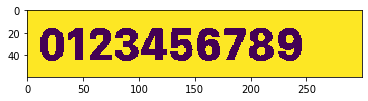

In [11]:
img_binary = genNeedImg(target, img_type='binary')
plt.imshow(img_binary) # 还是老毛病，matplotlab直接imshow 灰度图/二值图 会有色彩

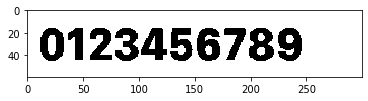

In [12]:
plt.imshow(img_binary, cmap='gray') 

上面的二值化效果不太好，考虑反转黑白进行二值化，或者可以调整二值化阈值

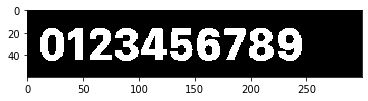

In [13]:
# 反转看看
img_binary0 = genNeedImg(target, img_type='binary', binary_revese=True)
plt.imshow(img_binary0, cmap='gray') 

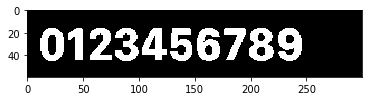

In [14]:
# 反转并调整阈值
img_binary = genNeedImg(target, img_type='binary', binary_revese=True, binary_therhold=78)
plt.imshow(img_binary, cmap='gray') # 还是老毛病，matplotlab直接imshow 灰度图/二值图 会有色彩

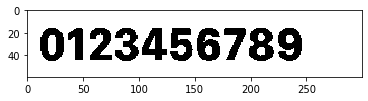

In [15]:
# 调整阈值，不反转
img_binary = genNeedImg(target, img_type='binary', binary_therhold=98)
plt.imshow(img_binary, cmap='gray') # 还是老毛病，matplotlab直接imshow 灰度图/二值图 会有色彩

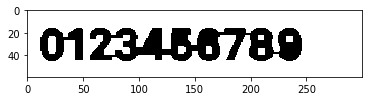

In [16]:
# 对binary去噪，腐蚀与膨胀
img_binary = cv.erode(img_binary, None, iterations=2)
img_binary = cv.dilate(img_binary, None, iterations=2)
plt.imshow(img_binary, cmap='gray')

### 在图像处理中，我们经常需要检测具有相同颜色的像素团（blob）。 这些像素团周围的边界被称为轮廓 （contour）。 OpenCV有一个内置的findContours()函数，可以用来检测这些连续的区域。
+ [Python+OpenCV教程13：轮廓](https://www.jianshu.com/p/9c186c3bdfcc)
+ [Python通过OpenCV的findContours获取轮廓并切割实例](https://www.jb51.net/article/132217.htm)
+ https://blog.csdn.net/weixin_41803874/article/details/91347667
+ https://blog.csdn.net/sinat_41104353/article/details/85171185



In [17]:
image, contours, hierarchy = cv.findContours(img_binary, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
image

ValueError: not enough values to unpack (expected 3, got 2)

[python调用cv2.findContours时报错：ValueError: not enough values to unpack (expected 3, got 2)](https://blog.csdn.net/miao0967020148/article/details/88623631)

In [18]:
contours, hierarchy = cv.findContours(img_binary0, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

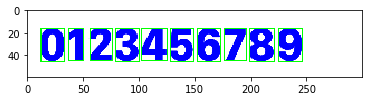

In [19]:
temp_img = img.copy() # 这里用一个copy，不然的话就直接在原始图像img上画轮廓了
for i in range(len(contours)):
    x, y, w, h = cv.boundingRect(contours[i])
    box = cv.rectangle(temp_img, (x, y), (x + w, y + h), (0, 255, 0), 1)
plt.imshow(box, cmap='gray')

In [20]:
# 由于直接划分的轮廓太多了（我换了字体后好像不会划分很多），这里考虑记录每个每个轮廓的数据，然后取 wxh （长x宽，即面积）的top4
boundings = [cv.boundingRect(contour) for contour in contours]
boundings

[(225, 16, 21, 30),
 (199, 16, 22, 30),
 (176, 16, 20, 29),
 (152, 16, 21, 30),
 (128, 16, 21, 30),
 (102, 16, 23, 29),
 (79, 16, 21, 30),
 (56, 16, 20, 29),
 (37, 16, 13, 29),
 (12, 16, 21, 30)]

[从一个集合中查找最大最小的N个元素——Python heapq 堆数据结构](https://www.cnblogs.com/bakari/p/4807847.html) --- 不需要，直接用list自带的sort就好
### ummm我突然想到，可以直接`lsit.sort(reverse=Ture) `排序之后 `list[:4]` 取出前四个
### 哦, 但是不行，这里boundings里面每个元素是tuple，然后是依据面积来排大小，所以得算出面积top4的tuple在list中的index

In [21]:
# 算每个轮廓的面积
bounding_scales = [ bounding[2]*bounding[3] for bounding in boundings]
bounding_scales.sort(reverse=True) # 默认reverse=False，升序
bounding_scales[:4]

[667, 660, 630, 630]

### 哦, 但是不行，这里boundings里面每个元素是tuple，然后是依据面积bounding_scales来排大小，
### 所以得算出面积top4的tuple在list中的index
### ummm, 突然又想到，其实没必要借助`bounding_scales`, 可以用sort的key指定排序的对象（按什么模式排序list）

In [22]:
boundings.sort(key=lambda tuple_x: tuple_x[2]*tuple_x[3], reverse=True) # lamdba传入的就是计算每个轮廓的面积，然后按面积大小排序
boundings[:4] # 这样直接取前4个就好了

[(102, 16, 23, 29), (199, 16, 22, 30), (225, 16, 21, 30), (152, 16, 21, 30)]

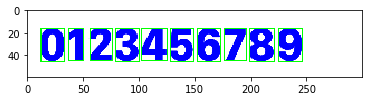

In [23]:
temp_img = img.copy()
for bounding in boundings[:4]:
    x, y, width, height = bounding
    img_addBox = cv.rectangle(temp_img, (x,y), (x + width, y + height), (0, 255, 0), 1)
plt.imshow(box, cmap='gray')

### 到此，基本上算是可以捕获到验证码的各个字符位置了
### 下面整理成一个函数，将字符分割保存出来

In [24]:
listA = [1,2,3,4]
strA = '1234'
zippedA = zip(listA, strA)
zippedA

In [25]:
for num, text in zippedA:
    print('num={}, text={}'.format(num, text))

num=1, text=1
num=2, text=2
num=3, text=3
num=4, text=4


In [26]:
# 如果元素数量不匹配，则选取较少的元素zip
for num, text in zip([1,2,3], 'abcd'):
    print('num={}, text={}'.format(num, text))

num=1, text=a
num=2, text=b
num=3, text=c


### 发现zip可以把list和str组合在一起，会将str的每个字符当成元素，进行组合

In [46]:
def captcha_character_detach(captcha_img_path, characters_save_path='./', captcha_len=4):
    captcha_img_basename = os.path.basename(captcha_img_path) # 从路径中提取带后缀文件名，如 '0415.png'
    captcha_text = os.path.splitext(captcha_img_basename)[0] # ['0415', 'png']
    img_gray = cv.imread(captcha_img_path, cv.IMREAD_GRAYSCALE) # 灰度图读入
    img_binary = genNeedImg(captcha_img_path, img_type='binary', binary_therhold=127, binary_reverse=True) # 直接调用genNeedImg生成二值图
    contours, hierarchy = cv.findContours(img_binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) # 划分字符轮廓
    # 由于直接划分的轮廓太多了（我换了字体后好像不会划分很多），这里考虑记录每个每个轮廓的数据，然后取 wxh （长x宽，即面积）的top4
    boundings = [cv.boundingRect(contour) for contour in contours] # 获取每个轮廓的信息，(x,y,width,height) x,y为轮廓最左上角坐标
    boundings.sort(key=lambda tuple_x: tuple_x[2]*tuple_x[3], reverse=True) # lamdba传入的就是计算每个轮廓的面积，然后按面积大小降序排序
    if len(boundings) < captcha_len: # 获取到的轮廓小于4，则说明没有把4个字符都区分开来
        print('Discard this captcha!')
        return # 直接结束，丢弃这个验证码样本
    '''
    # 下面开始画矩形分割框，这部分其实用不到，只是为了调试看画的样子
    # --------------------------------------------------------------------------------------
    temp_img = cv.imread(captcha_img_path, cv.IMREAD_UNCHANGED) # 以原始格式读入图片
    temp_img = bgr2rgb(temp_img) # 通道转换
    for bounding in boundings[:4]: # 取面积最大的前4个轮廓
        x, y, width, height = bounding
        img_addBox = cv.rectangle(temp_img, (x,y), (x + width, y + height), (0, 255, 0), 1)
    plt.imshow(img_addBox, cmap='gray')
    # ---------------------------------------------------------------------------------------
    '''
    boundings_save = sorted(boundings[:captcha_len], key=lambda tuple_x: tuple_x[0]) # 按轮廓的x坐标大小排序，tuple_x=(x,y,width,height) 
    for character_bounding, character_text in zip(boundings_save, captcha_text):
        x, y, width, height = character_bounding
        margin = 2 # 提取单个字符的时候，在获取的轮廓拓宽margin个像素，因为findContours()的轮廓可能很紧凑
        character_img = img_gray[y - margin:y + height + margin, x - margin:x + width + margin]
        if not os.path.exists(characters_save_path): # 如果要保存的路径不存在就创建该路径目录
            os.makedirs(characters_save_path)
        character_path = os.path.join(characters_save_path, '{}_0.png'.format(character_text))
        i = 0
        while True:
            i += 1
            if os.path.exists(character_path): # 该字符已经有样本，则在正确标签后面加_i, i标记重复次数
                character_path = os.path.join(characters_save_path, '{}_{}.png'.format(character_text, i))
            else: # 不存在重名路径，则跳出
                break
        cv.imwrite(character_path, character_img)
    print('Character detached from captcha, character has been saved at {}'.format(characters_save_path))

captcha_character_detach(target, './character')

Character detached from captcha, character has been saved at ./character
